**Parte 1) Análise de Dados Numéricos - Adult income dataset**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
adult = pd.read_csv('adult.csv')
var = pd.read_csv("std(div)mean.csv")

In [0]:
adult.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [0]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Uma mostra dos dados numéricos que estamos trabalhando

In [0]:
var.head()

,Unnamed: 0,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,mean,38.643.585,"1,90E+11",10.078.089,1.079.067.626,87.502.314,40.422.382
1,std,13.710.510,"1,06E+11",2.570.973,7.452.019.058,403.004.552,12.391.444
2,std/mean,"3,55E-01","5,57E-01","0,2551052089","6,905979642","4,605644509","0,3065490797"


Essa tabela será útil para a análise de algumas das features numéricas desse dataset.

**Age**

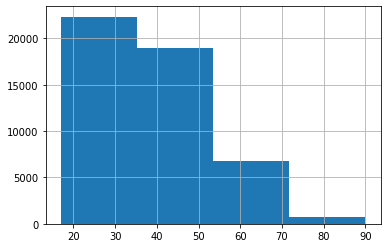

In [0]:
adult["age"].hist(bins = 4)
plt.show()

Podemos notar a partir desse gráfico que a maior parte das idades giram em torno dos 17 aos 53 anos.

Fato este que era esperado tendo que a PEA (**P**opulação **E**conomicamente **A**tiva) de um país geralmente gira em torno desses valores.

Sendo que mais de 25000 resultados são entre as idades de aproximadamente 17 a 35 anos (a mais comum).

Dados fora divididos em 4 bins:


1. *Jovem*: 17 aos 35 anos (categoria com maior número)
2. *Meia-idade*: 36 aos 53 anos
3. *Senhor*: 54 aos 71 anos
4. *Velho*: 71 aos 90 anos

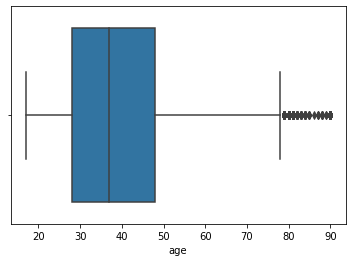

In [0]:
sns.boxplot(x = 'age', data=adult)

Podemos reparar que nossos outliers nesse caso se referem aos casos excepcionais de pessoas que tem mais de 77 anos e ainda trabalham (que como podemos ver no primeiro caso é apenas uma pequena parcela do gráfico).

**Educational-num**

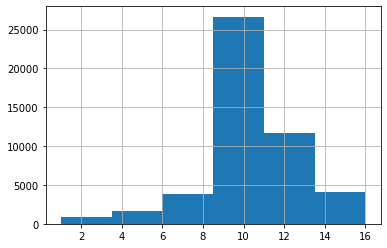

In [0]:
adult["educational-num"].hist(bins=6)
plt.show()

Educational-num é um fator numérico para representar o atributo educação de cada um dos analisados.

Podemos perceber que a maioria gira em torno dos valores 9 e 10, pouco acima da média (8) nesse padrão de divisão.

Outro fato importante é que dar features numéricas esta é a que os valores menos variam (**std/mean = *0,2551052089***)

Dividi os dados em 6 colunas e tentei uma analogia com os níveis de ensino no Brasil:

1.   Educação infantil (1 - 3,5)
2.   Ensino fundamental (3,6 - 6,0)
3.   Ensino médio (6,1 - 8,5)
4.   Ensino superior (8,6 - 11,0)  -> Maior quantidade de dados
5.   Mestrado (11,1 - 13,5)
6.   Doutorado (13,6 - 16,0)




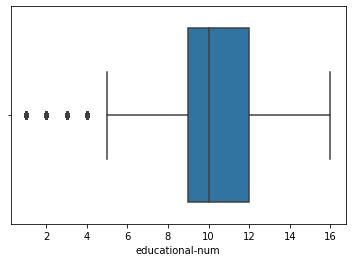

In [0]:
sns.boxplot(x = 'educational-num', data=adult)

Por este último gráfico podemos reparar que nossos outliers são pessoas apenas com educação infantil (<3,6 no educational-num), o que novamente era esperado pela análise anterior que a maioria dos dados se encontravam ao longo da faixa 10 (com ensino superior)

**Hours-per-week**

[]

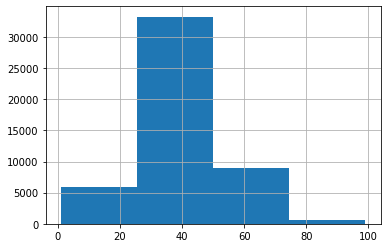

In [0]:
adult["hours-per-week"].hist(bins=4)
plt.plot()

Nessa parte eu busquei uma visualização que mostrasse:


1.   Meio-período: 1 - 25,5 horas
2.   Período integral: 26,6 - 50 horas
3.   Horas Extras: 50,1 - 74,5 horas
4.   Muito além: 74,6 - 99 horas

Temos que a maioria dos dados está concentrado no período integral, o que era esperado.

Novamente, usando o argumento da PEA, que se concentra nessa faixa de idade.



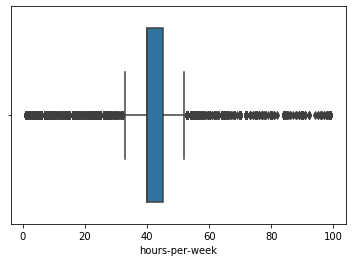

In [0]:
sns.boxplot(x = 'hours-per-week', data=adult)

Novamente, como o esperado, a maioria dos dados se encontra no período de trabalho integral (26,6 até 50 horas por semana) e todos os outros foram considerados outliers por terem muito menos dados quando comparados com o integral.

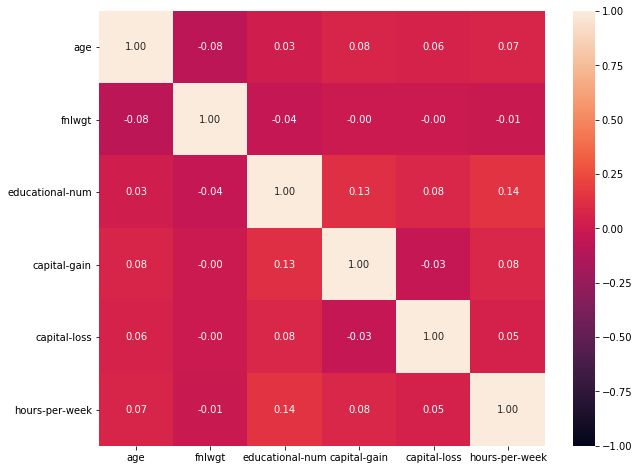

In [0]:
plt.figure(figsize=(10, 8))  # Aumenta o tamanho da figura
sns.heatmap(adult.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

Pela análise do heatmap das correlações do nosso dataset podemos inferir que não há uma relação muito expressiva entre os dados de forma geral.

Porém destaque para o fator 'educational-num' que tem a relação mais expressiva da tabela com 'hours-per-week' e também com 'capital-gain' (mesmo sendo, ainda assim, um valor não muito expressivo)

**Parte 2) Análise de Dados Categóricos - Adult income dataset**


**Marital-status**

In [0]:
colms = ['marital-status']
lbl = LabelEncoder()
adult['marital-status'] = lbl.fit_transform(adult[colms])
mappings = {index: label for index, label in enumerate(lbl.classes_)}
mappings

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{0: 'Divorced',
 1: 'Married-AF-spouse',
 2: 'Married-civ-spouse',
 3: 'Married-spouse-absent',
 4: 'Never-married',
 5: 'Separated',
 6: 'Widowed'}

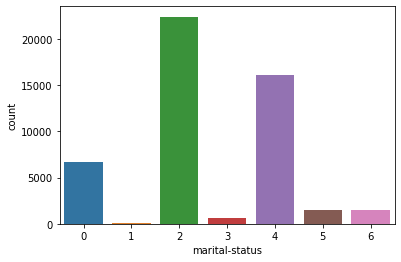

In [0]:
sns.countplot(adult['marital-status'])

Como eu não sei o que significa o AF e Civ, acho prudente considerar essas duas categorias como uma única categoria "casado" (até mesmo por que o AF quase não interfere).

Dito isso podemos ver que realmente a maioria das pessoas que trabalham nesse caso são as 'casadas' seguidas pelas que 'nunca-casaram'.

**Education**

In [0]:
cole = ['education']
lbl = LabelEncoder()
adult['education'] = lbl.fit_transform(adult[cole])
mappings = {index: label for index, label in enumerate(lbl.classes_)}
mappings

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{0: '10th',
 1: '11th',
 2: '12th',
 3: '1st-4th',
 4: '5th-6th',
 5: '7th-8th',
 6: '9th',
 7: 'Assoc-acdm',
 8: 'Assoc-voc',
 9: 'Bachelors',
 10: 'Doctorate',
 11: 'HS-grad',
 12: 'Masters',
 13: 'Preschool',
 14: 'Prof-school',
 15: 'Some-college'}

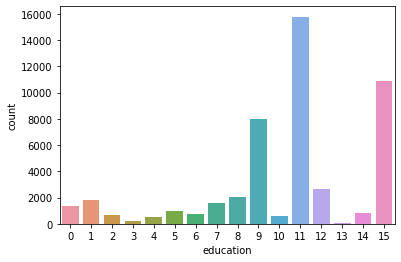

In [0]:
sns.countplot(adult['education'])

Diferentemente dos dados de educational-num que eu fiz uma estimativa do nível educacional, aqui temos um modelo um pouco mais exato que permite ver em detalhes o nível de escolaridade.

Sendo que a maior parte das pessoas tem nível de graduação até o colegial (ensino médio), seguidos por aqueles que fizeram alguma faculdade ('Some-college') e por fim aqueles que concluiram um curso de Ensino Superior ('Bachelors').

Portanto, a análise que fiz o Educational-num não me parece muito correta.



**Workclass**

In [0]:
colw = ['workclass']
lbl = LabelEncoder()
adult['workclass'] = lbl.fit_transform(adult[colw])
mappings = {index: label for index, label in enumerate(lbl.classes_)}
mappings


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{0: '?',
 1: 'Federal-gov',
 2: 'Local-gov',
 3: 'Never-worked',
 4: 'Private',
 5: 'Self-emp-inc',
 6: 'Self-emp-not-inc',
 7: 'State-gov',
 8: 'Without-pay'}

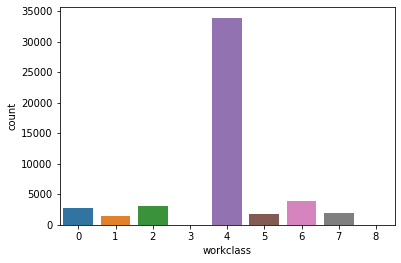

In [0]:
sns.countplot(adult['workclass'])

Este gráfico mostra algo até que esperado já, que a maioria das pessoas vai para área privada para buscar trabalho.

E que corporações privadas praticamente são uma hegemonia na escolha de onde trabalhar.

**Race**

In [0]:
colr = ['race']
lbl = LabelEncoder()
adult['race'] = lbl.fit_transform(adult[colr])
mappings = {index: label for index, label in enumerate(lbl.classes_)}
mappings

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{0: 'Amer-Indian-Eskimo',
 1: 'Asian-Pac-Islander',
 2: 'Black',
 3: 'Other',
 4: 'White'}

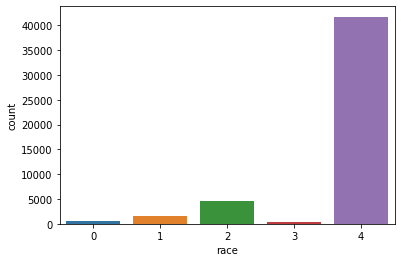

In [0]:
sns.countplot(adult['race'])

Vemos que a maioria das pessoas desse dataset correspondem a classificação de brancas quase em sua totalidade.

**Income baseado no race e marital-status**

In [0]:
coli = ['income']
lbl = LabelEncoder()
adult['income'] = lbl.fit_transform(adult[coli])
mappings = {index: label for index, label in enumerate(lbl.classes_)}
mappings

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{0: '<=50K', 1: '>50K'}

In [0]:
lbl = LabelEncoder()
adult['marital-status'] = lbl.fit_transform(adult['marital-status'])
adult['race'] = lbl.fit_transform(adult['race'])
adult['income'] = lbl.fit_transform(adult['income'])

income = adult['income']
marital_status = adult['marital-status']
race = adult['race']

In [0]:
aiem = aieM = apcm = apcM = bm = bM = om = oM = wm = wM = 0 
# o M é para maior que 50K
# o m é para menor que 50K

for i in range(len(income)):
  if income[i] == 0 and race[i] == 0:
    aiem += 1
  elif income[i] == 1 and race[i] == 0:
    aieM += 1
  elif income[i] == 0 and race[i] == 1:
    apcm += 1
  elif income[i] == 1 and race[i] == 1:
    apcM += 1
  elif income[i] == 0 and race[i] == 2:
    bm += 1
  elif income[i] == 1 and race[i] == 2:
    bM += 1
  elif income[i] == 0 and race[i] == 3:
    om += 1
  elif income[i] == 1 and race[i] == 3:
    oM += 1
  elif income[i] == 0 and race[i] == 4:
    wm += 1
  elif income[i] == 1 and race[i] == 4:
    wM +=1

beleza, eu sei que isso ta longe de parecer uma análise de dados eficiente, mas eu não tava fazendo a menor ideia de como trabalhar com as categóricas, então digamos que dei meu jeito aqui.

In [0]:
'''{0: 'Amer-Indian-Eskimo',  #colocar o dicionário aqui pra não 
    1: 'Asian-Pac-Islander',  #precisar subir muito para procurar
    2: 'Black',
    3: 'Other',
    4: 'White'} '''

sumrM = aieM + apcM + bM + oM + wM      
sumrm = aiem + apcm + bm + om + wm
totalr = sumM + summ
print("(Amer-Indian-Eskimo >50)/total:    ", aieM/total)
print("(Amer-Indian-Eskimo <=50)/total:   ",aiem/total)
print("(Asian-Pac-Islander >50)/total:    ",apcM/total)
print("(Asian-Pac-Islander <=50)/total:   ",apcm/total)
print("(Black >50)/total:                 ",bM/total)
print("(Black <=50)/total:                ",bm/total)
print("(Other >50)/total:                 ",oM/total)
print("(Other <=50)/total:                ",om/total)
print("(White >50)/total:                 ",wM/total)
print("(White <=50)/total:                ",wm/total)
print()
print(75*'-')
print()
print("Porcentagem de Amer-Indian-Eskimo >50:     ", aieM/(aieM+aiem))
print("Porcentagem de Asian-Pac-Islander >50:     ",apcM/(apcM+apcm))
print("Porcentagem de Black >50:                  ",bM/(bM+bm))
print("Porcentagem de Other >50:                  ",oM/(oM+om))
print("Porcentagem de White >50:                  ",wM/(wM+wm))

(Amer-Indian-Eskimo >50)/total:     0.0011260800131034764
(Amer-Indian-Eskimo <=50)/total:    0.008496785553417142
(Asian-Pac-Islander >50)/total:     0.00837394046107858
(Asian-Pac-Islander <=50)/total:    0.0227263420826338
(Black >50)/total:                  0.011588387043937595
(Black <=50)/total:                 0.08433315589042217
(Other >50)/total:                  0.0010237091028213422
(Other <=50)/total:                 0.007288808812087957
(White >50)/total:                  0.21716964907251957
(White <=50)/total:                 0.6378731419679784

---------------------------------------------------------------------------

Porcentagem de Amer-Indian-Eskimo >50:      0.11702127659574468
Porcentagem de Asian-Pac-Islander >50:      0.26925608953258723
Porcentagem de Black >50:                   0.1208110992529349
Porcentagem de Other >50:                   0.12315270935960591
Porcentagem de White >50:                   0.2539868780230832


Certo e o que podemos tirar daqui ?

Bom, o primeiro bloco de dados não é muito significativo por que ele mostra como o nosso target (income) está distribuído entre as etnias e, como temos muito mais brancos nos dados era esperado que essa distribuição também pendesse mais para os brancos.

Portanto era melhor olhar o segundo bloco, que mostra qual a porcentagem de cada etnia recebe mais de 50 mil e daí conseguimos ver a discrepância.

Aproximadamente 1/4 dos White e Asian-Pac-Islander conseguem obter mais de 50 mil, sendo que apenas cerca de 1/8 das outras etnias consegue o mesmo feito.

In [0]:
'''{0: 'Divorced',                #Para essa análise vou utilizar 1 e 2 como a mesma classificação
    1: 'Married-AF-spouse',
    2: 'Married-civ-spouse',
    3: 'Married-spouse-absent',
    4: 'Never-married',
    5: 'Separated',
    6: 'Widowed'}'''

dM = dm = msM = msm = msaM = msam = nmM = nmm = sm = sM = wwM = wwm = 0

for i in range(len(income)):
  if income[i] == 0 and marital_status[i] == 0:
    dm += 1
  elif income[i] == 1 and marital_status[i] == 0:
    dM += 1
  elif income[i] == 0 and (marital_status[i] == 1 or marital_status[i] == 2):
    msm += 1
  elif income[i] == 1 and (marital_status[i] == 1 or marital_status[i] == 2):
    msM += 1
  elif income[i] == 0 and marital_status[i] == 3:
    msam += 1
  elif income[i] == 1 and marital_status[i] == 3:
    msaM += 1
  elif income[i] == 0 and marital_status[i] == 4:
    nmm += 1
  elif income[i] == 1 and marital_status[i] == 4:
    nmM +=1
  elif income[i] == 0 and marital_status[i] == 5:
    sm += 1
  elif income[i] == 1 and marital_status[i] == 5:
    sM +=1
  elif income[i] == 0 and marital_status[i] == 6:
    wwm += 1
  elif income[i] == 1 and marital_status[i] == 6:
    wwM +=1

In [0]:
summsm = dm + msm + msam + nmm + sm + wwm
summsM = dM + msM + msaM + nmM + sM + wwM
totalms = summsm + summsm

print("Divorciados/Total:         ", (dm+dM)/(totalms))
print("Casados/Total:             ", (msm+msM)/(totalms))
print("Conjuge-ausente/Total:     ", (msam+msaM)/(totalms))
print("Nunca-casou/Total:         ", (nmm+nmM)/(totalms))
print("Separados/Total:           ", (sm+sM)/(totalms))
print("Viúvos/Total:              ", (wwm+wwM)/(totalms))
print()
print(75*'-')
print()
print("Porcentagem de Divorciados >50:        ", dM/(dm+dM))
print("Porcentagem de Casados >50:            ", msM/(msm+msM))
print("Porcentagem de Conjuge-ausente >50:    ", msaM/(msam+msaM))
print("Porcentagem de Nunca-casou >50:        ", nmM/(nmm+nmM))
print("Porcentagem de Separados >50:          ", sM/(sm+sM))
print("Porcentagem de Viúvos >50:             ", wwM/(wwm+wwM))

Divorciados/Total:          0.0892612030682277
Casados/Total:              0.30165522809850626
Conjuge-ausente/Total:      0.008451083299690486
Nunca-casou/Total:          0.21688870946036873
Separados/Total:            0.020589422688736373
Viúvos/Total:               0.020427937020589423

---------------------------------------------------------------------------

Porcentagem de Divorciados >50:         0.1011608623548922
Porcentagem de Casados >50:             0.4460206995003569
Porcentagem de Conjuge-ausente >50:     0.09235668789808917
Porcentagem de Nunca-casou >50:         0.045479928026307626
Porcentagem de Separados >50:           0.06470588235294118
Porcentagem de Viúvos >50:              0.08432147562582346


Achei surpreendente o resultado, quase 45% dos casados recebem mais de 50 mil o que não me parece algo tão intuitivo de se pensar sem ter uma análise dos dados.

Após isso apenas os Divorciados se destacam com cerca de 10% recebendo mais de 50 mil, o que de qualquer forma nos mostra a discrepância desses resultados.